## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
import pandas as pd

df = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       204 non-null    object
 1   age        204 non-null    int64 
 2   sex        204 non-null    int64 
 3   cp         204 non-null    int64 
 4   trtbps     204 non-null    int64 
 5   chol       204 non-null    int64 
 6   restecg    204 non-null    int64 
 7   thalach    204 non-null    int64 
 8   diagnosis  204 non-null    object
dtypes: int64(7), object(2)
memory usage: 14.5+ KB


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df[['age', 'chol']]
y = df['diagnosis'].map({'No Disease': 0, 'Disease': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('logreg', LogisticRegression())  # Step 2: Logistic Regression
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5365853658536586
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.60      0.62      0.61        24

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41



In [ ]:
import numpy as np
logreg = pipeline.named_steps['logreg']
scaler = pipeline.named_steps['scaler']

coefficients = logreg.coef_[0]  # [age_coef, chol_coef]
intercept = logreg.intercept_[0]

mean = scaler.mean_
scale = scaler.scale_

adjusted_coefficients = coefficients / scale

adjusted_intercept = intercept - np.sum((mean * coefficients) / scale)

print("Adjusted Coefficients (raw scale):", adjusted_coefficients)
print("Adjusted Intercept (raw scale):", adjusted_intercept)


Adjusted Coefficients (raw scale): [-0.04359409 -0.0027935 ]
Adjusted Intercept (raw scale): 3.2624219147469273



z = 2.197 (90%)
2.197 = (log(55))(-0.045) + x(-0.0028) + 3.26

## 2. Linear Discriminant Analysis


Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df[['age', 'chol']]
y = df['diagnosis'].map({'No Disease': 0, 'Disease': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("LDA Coefficients:", lda.coef_)
print("LDA Intercept:", lda.intercept_)


Accuracy: 0.5365853658536586
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.60      0.62      0.61        24

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41

LDA Coefficients: [[-0.04440064 -0.00275855]]
LDA Intercept: [3.29721706]


In [ ]:
intercept = 3.29721706
age_coeff = -0.04440064
chol_coeff = -0.00275855
age = 55

cholesterol_threshold = (-intercept - (age_coeff * age)) / chol_coeff
print("LDA:", cholesterol_threshold)


LDA: 310.0113682913125


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df[['age', 'chol']]  # Predictors
y = df['diagnosis'].map({'No Disease': 0, 'Disease': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear'))
])

# Define the parameter grid for tuning
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'svc__C': 1}
Best Cross-Validation Score: 0.6195075757575758
Test Accuracy: 0.6097560975609756
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.59      0.56        17
           1       0.68      0.62      0.65        24

    accuracy                           0.61        41
   macro avg       0.60      0.61      0.60        41
weighted avg       0.62      0.61      0.61        41



## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

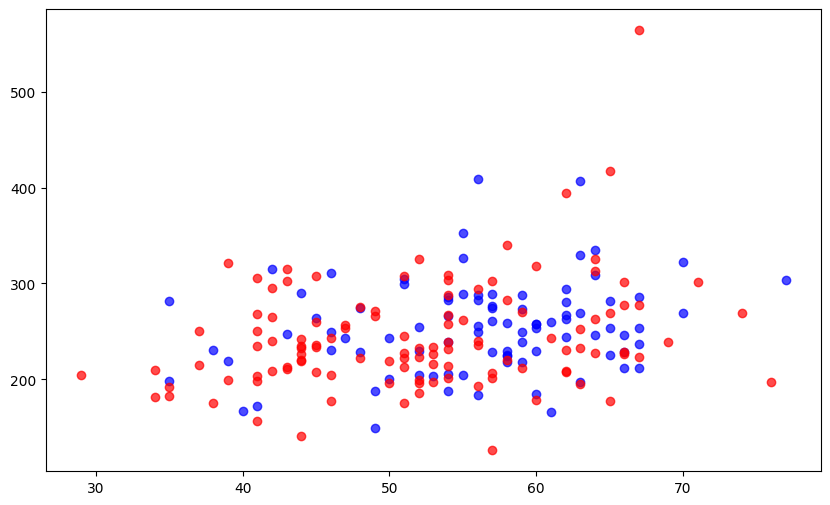

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Prepare data
X = df[['age', 'chol']]  # Predictors
y = df['diagnosis'].map({'No Disease': 0, 'Disease': 1})  # Binary outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=1.0))  # Regularization parameter can be tuned
])

lda_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1.0))  # Regularization parameter can be tuned
])

logreg_pipeline.fit(X_train, y_train)
lda_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
for outcome, color, label in zip([0, 1], ['blue', 'red'], ['No Disease', 'Disease']):
    plt.scatter(X['age'][y == outcome], X['chol'][y == outcome], color=color, label=label, alpha=0.7)

def plot_decision_boundary(pipeline, label, color):
    model = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]  # Last step in pipeline
    coef = model.coef_[0] if hasattr(model, 'coef_') else model.scalings_.T[0]  # Handle SVC vs LDA
    intercept = model.intercept_[0] if hasattr(model, 'intercept_') else model.xbar_.dot(model.scalings_.T[0])

